**Problem Statement:** There is a huge number of digital archival images of one of the influencial persons in the history of the world, Mahatma Gandhi. We want to process those images with computer vision and machine learning tools to identify the people in those images. Although classically it is an easy task. But as Havlicek V. et al. suggested in their paper (https://arxiv.org/abs/1804.11326) that we may get computational speedup if we can use efficient and effective quantum algorithm. So, our main goal of this project is to build an efficient multiclass quantum classifier to process images.

**Project plan:** At first, we have chosen a publicly available dataset to run our algorithm and have found CIFAR-10 dataset is one of the suitable ones to run our experiments. The deatils of the dataset is given in the link: https://www.cs.toronto.edu/~kriz/cifar.html. From our theoretical understanding we have found that we can only perform binary classification within the hilbert space unless it is not an ensemble or any other state-of-the-art approach. So, we can only classify 2 classes at a time. Therefore, to build a multiclass classifier, we have taken 2 classes multiple times. In our project, we have three different team who have worked on 3 different platforms. Qiskit team has 3 members. IBM qiskit simulator has two different approachs. One approach is pretty straignt forward. We encode our data to the qubits, use parameterized circuit, measurement and cost function to train our quantum circuit and then with the optimized parameter from the optimizer, we performe our test on the test dataset. Another approach is given in the link: (https://github.com/Qiskit/qiskit-machine-learning/blob/stable/0.2/docs/tutorials/05_torch_connector.ipynb). In this approach, a Qiskit's TorchConnector class is introduced. TorchConnector allows a natural integration of any NeuralNetwork from Qiskit Machine Learning into a PyTorch workflow.TorchConnector takes a Qiskit NeuralNetwork and makes it available as a PyTorch Module. The resulting module can be seamlessly incorporated into PyTorch classical architectures and trained jointly without additional considerations, enabling the development and testing of novel hybrid quantum-classical machine learning architectures.We have performed our experiments on the data with both of the approachs. 



**QISKIT Platform (Approach 1):** In this approach, we prepared a variational Quantum Classifier for image classification. A variational Quantum Classifier has the following elements: Data Encoding Circuit, Parameterized Circuit, Measurement, Cost Function and Optimization. We have developed those and tweaked and trained our model accordingly. After that similar to train data, we processed our test data. When we have found our optimum parameter, we have applied the parameter on the test sample to test the performance of our model.

**Inspiration:** https://www.youtube.com/watch?v=5Kr31IFwJiI&t=4s

**Setting up our environment:** We need to install only the qiskit module in this approach.

In [2]:
pip install qiskit

     |████████████████████████████████| 6.1 MB 4.3 MB/s 
     |████████████████████████████████| 18.0 MB 121 kB/s 
     |████████████████████████████████| 235 kB 69.5 MB/s 
     |████████████████████████████████| 207 kB 66.6 MB/s 
     |████████████████████████████████| 2.1 MB 68.6 MB/s 
     |████████████████████████████████| 200 kB 72.7 MB/s 
     |████████████████████████████████| 1.4 MB 32.2 MB/s 
     |████████████████████████████████| 635 kB 50.8 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 943 kB 50.7 MB/s 
     |████████████████████████████████| 33.9 MB 18 kB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 3.2 MB 27.3 MB/s 
     |████████████████████████████████| 6.3 MB 39.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.29.0-py3-none-any.whl size=11179 sha256=5ff09124f5107c758deb46eafe70a31754a7dc9c8e7d1d0e554bb24ea3bda084
  Stored in directory: /root/.cache/pip/whe

**Importing Required Libraries:** We have to import all the reuired libraries and functions first to download, manipulate, train-test and optimize the quantum system to reach the desired outcome.

In [1]:
import copy
import tensorflow as tf

import numpy as np
import collections

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import qiskit
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister

**Data Accumulation:** We take advantage of the TensorFlow API to directly load CIFAR10 dataset. We have downloaded our data and split that into train and test sets. We converted the images to single channel and resized that to 4*4 matrix. After that, as promised earlier, we took two of the ten classes from the data to do classification. In this experiement, we have chosen first two classes, Airplane and Automobile.

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


**Data Size:**

In [5]:
len(X_train)

50000

**Image Conversion and Resizing:**

In [6]:
X_train= tf.image.rgb_to_grayscale(X_train)
X_train=tf.image.resize(X_train, [4,4])
X_train.shape

TensorShape([50000, 4, 4, 1])

**Picking 2 Classes from 10:**

In [7]:
x_train_n=[]
y_train_n=[]
for i in range(len(X_train)):
    if y_train[i]==[0] or y_train[i]==[1]:
        x_train_n.append(X_train[i])
        y_train_n.append(y_train[i])

In [8]:
x_train_n=x_train_n[:1000]
X_train=np.array(x_train_n)

**Checking Data Shape and Size:**

In [9]:
len(X_train)

1000

In [10]:
X_train.shape

(1000, 4, 4, 1)

**Renormalizing Our Data:**

In [11]:
X_train=np.array((X_train),dtype="float64").reshape(-1, 16)
X_train=X_train/255
X_train[0:5]

array([[0.37156863, 0.38921569, 0.66078431, 0.68529412, 0.26862745,
        0.31568627, 0.32254902, 0.25196078, 0.35294118, 0.81470588,
        0.61666667, 0.33431373, 0.31764706, 0.28137255, 0.18235294,
        0.04901961],
       [0.37745098, 0.15686275, 0.65490196, 0.34705882, 0.43235294,
        0.54215686, 0.51764706, 0.56568627, 0.17941176, 0.28431373,
        0.24803922, 0.1745098 , 0.56372549, 0.07647059, 0.10490196,
        0.2627451 ],
       [0.86176471, 0.89803922, 0.92941176, 0.88333333, 0.90980392,
        0.07058824, 0.20294118, 0.98529412, 0.12352941, 0.03039216,
        0.03627451, 0.94215686, 0.31372549, 0.19509804, 0.38431373,
        0.95686275],
       [0.47745098, 0.49705882, 0.51764706, 0.47941176, 0.50588235,
        0.56176471, 0.65882353, 0.5       , 0.25098039, 0.69215686,
        0.4754902 , 0.49901961, 0.48039216, 0.51078431, 0.50392157,
        0.39901961],
       [0.14411765, 0.13529412, 0.19411765, 0.2372549 , 0.2245098 ,
        0.76568627, 0.36666667, 

**Checking Data Type and Data Shape:**

In [12]:
X_train.dtype

dtype('float64')

In [13]:
X_train.shape

(1000, 16)

**Preparing Data Size For Training:** In this case, we have chosen first 1000 images from our selected classes to train our model.

In [14]:
y_train_n=y_train_n[:1000]
y_train=np.array(y_train_n).reshape(-1,)
y_train[:10]

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=uint8)

In [15]:
y_train.shape

(1000,)

**Preparing Quantum Neural Network:** For 4 by 4 image, we have to take 16 qubits because each image of 4 by 4 contains 16 features or 16 matrix element. So, to encode the data into qubit, we need 16 qubits. We apply amplitude encoding technique to encode our data. That means, the initial amplitude of quantum states of each qubit will be equal to the each element of the matrix of an image. After that, we have created the NN with CNOT and rotational gates, ry with measurement performed on first qubit. 

In [16]:
N=16 #no of qubits

In [17]:
def feature_map(X): #amplitude encoding
    q=QuantumRegister(N)
    c=ClassicalRegister(1)
    qc=QuantumCircuit(q,c)

    for i, x in enumerate(X):
        qc.rx(x, i)
    return qc, c

In [18]:
def variational_circuit(qc, theta): #parameterized circuit
    
    for i in range(N-1):
        qc.cx(i,i+1)
    qc.cx(N-1, 0)
    for i in range(N):
        qc.ry(theta[i], i)
    return qc

In [19]:
def quantum_nn(x, theta, simulator=True): #Building QNN
    qc,c=feature_map(x)
    qc.barrier()
    qc=variational_circuit(qc, theta)
    qc.barrier()
    qc.measure(0,c)


    shots=1E4
    backend=Aer.get_backend('qasm_simulator')
    job=qiskit.execute(qc, backend, shots=shots)
    result=job.result()
    counts=result.get_counts()
    
    return counts['1']/shots

**Loss Function:**

In [20]:
def loss_function(prediction, target):
    return (prediction-target)**2

**Optimizer:** In this section, we created a gradient descent optimizer. Gradient descent optimizer is first order iterative optimizer. It moves its position based on its previous step and keeps updating the parameter of the parameterized circuit for reaching a local maximum of the function. 

**Reference:** https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/#:~:text=Gradient%20descent%20is%20an%20iterative,function%20at%20the%20current%20point.

In [21]:
def gradient(x, y, theta):
    
    delta=0.01
    grad=[]
    for i in range(len(theta)):
        dtheta=copy.copy(theta)
        dtheta[i]+=delta
        
        pred1=quantum_nn(x, dtheta)
        pred2=quantum_nn(x, theta)
        
        grad.append((loss_function(pred1,y)-loss_function(pred2,y))/delta)
        
        return np.array(grad)

**Function To Test Accuracy:** This function will check the amount of data that is correctly predicted.

In [22]:
def accuracy(x, y, theta):
    counter=0
    for x_i, y_i in zip(x,y):
        prediction= quantum_nn(x_i, theta)
        
        if prediction <0.5 and y_i==0:
            counter +=1
        elif prediction >=0.5 and y_i==1:
            counter +=1
    return counter/len(y)

**Training Quantum Neural Network:** We have used learning rate of 0.01 to train our model. We have selected 20 epochs and our gradient descent optimizer in this case.

In [23]:
eta=0.01
loss_list=[]
theta=np.ones(N)
print('Epoch \t Loss \t Training accuracy')

for i in range(20):
    loss_temp=[]
    for X_i, y_i in zip(X_train, y_train):

        prediction= quantum_nn(X_i, theta)
        loss_temp.append(loss_function(prediction, y_i))
        theta= theta- eta * gradient(X_i, y_i, theta)
    
    loss_list.append(np.mean(loss_temp))
    acc = accuracy(X_train, y_train, theta)
    
    print(f'{i} \t {loss_list[-1]:3f} \t {acc:3f}')

Epoch 	 Loss 	 Training accuracy
0 	 0.259847 	 0.486000
1 	 0.255834 	 0.460000
2 	 0.251289 	 0.450000
3 	 0.249444 	 0.537000
4 	 0.248241 	 0.523000
5 	 0.247026 	 0.521000
6 	 0.247101 	 0.509000
7 	 0.246791 	 0.506000
8 	 0.247086 	 0.504000
9 	 0.246219 	 0.514000
10 	 0.247187 	 0.517000
11 	 0.247321 	 0.511000
12 	 0.246266 	 0.524000
13 	 0.247454 	 0.520000
14 	 0.247080 	 0.510000
15 	 0.247735 	 0.504000
16 	 0.246494 	 0.507000
17 	 0.246886 	 0.510000
18 	 0.246558 	 0.513000
19 	 0.246363 	 0.503000


**Plotting Loss:** We are visualizing our loss result in the following section:

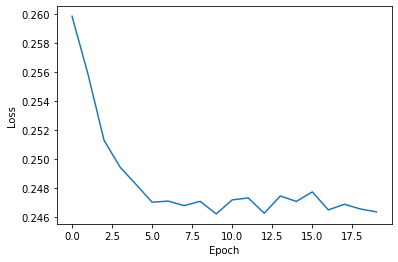

In [24]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**Preparing Test Data:** We have to prepare the test data now. The structure of the data should be similar as training datasets.

In [25]:
X_test= tf.image.rgb_to_grayscale(X_test)
X_test=tf.image.resize(X_test, [4,4])
X_test.shape

TensorShape([10000, 4, 4, 1])

In [26]:
x_test_n=[]
y_test_n=[]
for i in range(len(X_test)):
    if y_test[i]==[0] or y_test[i]==[1]:
        x_test_n.append(X_test[i])
        y_test_n.append(y_test[i])

**Choosing Test Size:** We have chosen 50 images to test the performance of our model.

In [27]:
x_test_n=x_test_n[:50]
X_test=np.array(x_test_n)

**Checking Test Data Size and Shape:**

In [28]:
len(X_test)

50

In [29]:
X_test.shape

(50, 4, 4, 1)

**Renormalizing Test Data:**

In [30]:
X_test=np.array((X_test),dtype="float64").reshape(-1, 16)
X_test=X_test/255
X_test[0:5]

array([[0.75980392, 0.60784314, 0.64117647, 0.80980392, 0.7254902 ,
        0.76470588, 0.76764706, 0.79509804, 0.83627451, 0.19411765,
        0.24313725, 0.7372549 , 0.25      , 0.22156863, 0.22352941,
        0.24411765],
       [0.37941176, 0.24803922, 0.22352941, 0.16470588, 0.21862745,
        0.44313725, 0.53529412, 0.23333333, 0.71960784, 0.12352941,
        0.60196078, 0.62058824, 0.2254902 , 0.21764706, 0.25686275,
        0.01764706],
       [0.95588235, 0.52058824, 0.75392157, 0.79705882, 0.84607843,
        0.43235294, 0.45098039, 0.95588235, 0.32254902, 0.24509804,
        0.4254902 , 0.30294118, 0.59607843, 0.18039216, 0.36764706,
        0.25392157],
       [0.4745098 , 0.48921569, 0.50392157, 0.57352941, 0.48431373,
        0.48823529, 0.77254902, 0.62745098, 0.45686275, 0.75980392,
        0.52058824, 0.49607843, 0.49705882, 0.70588235, 0.50196078,
        0.47843137],
       [0.96862745, 0.96764706, 0.96470588, 0.96078431, 0.96176471,
        0.88137255, 0.24313725, 

In [31]:
X_test.dtype

dtype('float64')

In [32]:
X_test.shape

(50, 16)

In [33]:
y_test_n=y_test_n[:50]
y_test=np.array(y_test_n).reshape(-1,)
y_test[:10]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=uint8)

In [34]:
y_test.shape

(50,)

**Accuracy Testing:** After preparing our test data, we have tested the performace of our model and found with accuracy 46%.

In [35]:
accuracy(X_test, y_test, theta)

0.46

**Further Improvement:** The accuracy of this model can be improved by better encoding technique. We can also increase data size for both test and training model. We can change the parameterized circuit and tweak and train the model further to check the outcome.